# <center>Волновой алгоритм поиска пути и его компьютерная реализация</center>
## <center>Введение</center>
<center>(постановка задачи)</center>

	
## <center>Представление графа в памяти компьютера</center>

Представим себе лабиринт, что в математической интерпретации и будет являться графом, запишем этот лабиринт в виде двумерной матрицы, где ноль будет обозначать стену, а единица – проход. Но для лучшего понимания необходимо увеличить размер стены до размера проходов.
Таким образом можно описать лабиринт любой сложности. Однако, у этого представления есть один недостаток, если убрать одну стену, то вместо нее появится не проход, а полноценная локация. Этот недостаток имеет серьезное негативное влияние на алгоритмы генерации лабиринтов.
Существует другой способ описать лабиринт. В каждой локации лабиринта нас интересует только наличие стены и наличие прохода, то есть, пусть будет 4 параметра: left, top, right, bottom - типа Boolean, 0 - есть стена, 1 - нет.
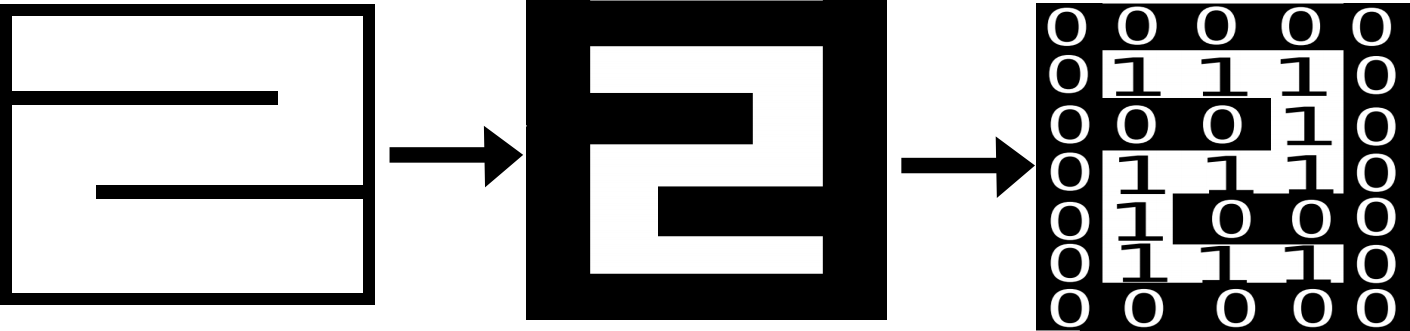

<img src="1.png">

In [2]:
import numpy as np
import tkinter
from tkinter import Canvas


GRAD_COLORS = ['#7fffd4', '#99ffdb', '#b0ffe2', '#c6ffe9', '#dafff1', '#edfff8']

# Зададим размеры нашего лабиринта
n, m = 16, 16
np.random.seed(0)


# Зададим функцию определения начальной и конечной точек
def start_end(mapp):
    start = (np.random.randint(mapp.shape[0]), np.random.randint(mapp.shape[1]))
    end = (np.random.randint(mapp.shape[0]), np.random.randint(mapp.shape[1]))
    while mapp[start] == -1:
        start = (np.random.randint(mapp.shape[0]), np.random.randint(mapp.shape[1]))
    while mapp[end] == -1 or start == end:
        end = (np.random.randint(mapp.shape[0]), np.random.randint(mapp.shape[1]))
        
    return start, end


# Print map function
def print_map(mapp, start, end, way=[], is_waves=False):
    n, m = mapp.shape[0], mapp.shape[1]
    width = 1080 // n
    height = 1080 // m

    window = tkinter.Tk()
    window.title('Map')
    window.geometry('1080x1080')
    window.config(bg='#345')

    canvas = Canvas(window, width=1080, height=1080)
    canvas.pack()

    y = 0
    for i in range(n):
        x = 0
        for j in range(m):
            if (i, j) == start:
                canvas.create_rectangle(x, y, x+width, y+height, fill='green')
            elif (i, j) == end:
                canvas.create_rectangle(x, y, x+width, y+height, fill='red')
            elif mapp[i, j] == -1:
                canvas.create_rectangle(x, y, x+width, y+height, fill='grey')
            elif mapp[i, j] == -2:
                canvas.create_rectangle(x, y, x+width, y+height, fill='black')
            elif (i, j) in way:
                canvas.create_rectangle(x, y, x+width, y+height, fill='#8FFF18')
            elif is_waves:
                color = GRAD_COLORS[(abs(i - start[0]) + abs(j - start[1])) % len(GRAD_COLORS)]
                canvas.create_rectangle(x, y, x+width, y+height, fill=color)
            else:
                canvas.create_rectangle(x, y, x+width, y+height, fill='beige')
            canvas.create_text((x+width/2, y+height/2), \
                               font=('Courier New', min(width, height) // 2), \
                               text=str(mapp[i, j]))
            x += width
        y += height
    window.mainloop()

In [3]:
np.random.seed(13)
mapp = np.random.randint(-1, 3, (n, m))
for i in range(mapp.shape[0]):
    for j in range(mapp.shape[1]):
        if mapp[i, j] >= 0:
            mapp[i, j] = 0
start, end = start_end(mapp)

print_map(mapp, start, end)

## Алгоритм Ли
##### Инициализация

In [4]:
# Создадим дополнительный массив специально для алгоритма
# -2 здесь будет означать стенку, а -1 как значение, которое еще не рассматривалось
mapp_dists = np.full((n, m), -1)
for i in range(n):
    for j in range(m):
        if mapp[i, j] == -1:
            mapp_dists[i, j] = -2

# Пометим стартовую ячейку
d = 0
mapp_dists[start] = d

##### Распространение волны
ЦИКЛ
ДЛЯ каждой ячейки loc, помеченной числом d
пометить все соседние свободные непомеченные ячейки числом d + 1
КЦ
d := d + 1
ПОКА (финишная ячейка не помечена) И (есть возможность распространения волны)

In [5]:
def needed_coordinates(lab, d):
    res = list()
    for i in range(lab.shape[0]):
        for j in range(lab.shape[1]):
            if lab[i, j] == d:
                res.append((i, j))
    return res

In [6]:
while mapp_dists[end] == -1 and len(needed_coordinates(mapp_dists, d)) != 0:
    for cell in needed_coordinates(mapp_dists, d):
        if cell[1]-1 >= 0 and mapp_dists[cell[0], cell[1]-1] == -1 and mapp[cell[0], cell[1]-1] != -1:
            mapp_dists[cell[0], cell[1]-1] = d + 1

        if cell[0]-1 >= 0 and mapp_dists[cell[0]-1, cell[1]] == -1 and mapp[cell[0]-1, cell[1]] != -1:
            mapp_dists[cell[0]-1, cell[1]] = d + 1

        if cell[1]+1 < mapp_dists.shape[1] and mapp_dists[cell[0], cell[1]+1] == -1 and mapp[cell[0], cell[1]+1] != -1:
            mapp_dists[cell[0], cell[1]+1] = d + 1

        if cell[0]+1 < mapp_dists.shape[0] and mapp_dists[cell[0]+1, cell[1]] == -1 and mapp[cell[0]+1, cell[1]] != -1:
            mapp_dists[cell[0]+1, cell[1]] = d + 1

    d+=1

In [7]:
print_map(mapp_dists, start, end)

##### Восстановление пути
ЕСЛИ финишная ячейка помечена
ТО
  перейти в финишную ячейку
  ЦИКЛ
    выбрать среди соседних ячейку, помеченную числом на 1 меньше числа в текущей ячейке
    перейти в выбранную ячейку и добавить её к пути
  ПОКА текущая ячейка — не стартовая
  ВОЗВРАТ путь найден
ИНАЧЕ
  ВОЗВРАТ путь не найден

In [8]:
way = [end]
if mapp_dists[end] > 0:
    curr = end
    while curr != start:
        if curr[1]-1 >= 0 and mapp_dists[curr[0], curr[1]-1] == mapp_dists[curr] - 1:
            curr = (curr[0], curr[1]-1)
            way.append(curr)
        elif curr[0]-1 >= 0 and mapp_dists[curr[0]-1, curr[1]] == mapp_dists[curr] - 1:
            curr = (curr[0]-1, curr[1])
            way.append(curr)
        elif curr[1]+1 < mapp.shape[1] and mapp_dists[curr[0], curr[1]+1] == mapp_dists[curr] - 1:
            curr = (curr[0], curr[1]+1)
            way.append(curr)
        elif curr[0]+1 < mapp.shape[0] and mapp_dists[curr[0]+1, curr[1]] == mapp_dists[curr] - 1:
            curr = (curr[0]+1, curr[1])
            way.append(curr)
else:
    print('Пути не найдено :(')

In [9]:
print_map(mapp, start, end, way)

#### Волновой алгоритм одной функцией

In [10]:
def init(mapp, start):
    n = mapp.shape[0]
    m = mapp.shape[1]

    # Создадим дополнительный массив специально для алгоритма
    # -2 здесь будет означать стенку, а -1 как значение, которое еще не рассматривалось
    mapp_dists = np.full((n, m), -1)
    for i in range(n):
        for j in range(m):
            if mapp[i, j] == -1:
                mapp_dists[i, j] = -2

    # Пометим стартовую ячейку
    d = 0
    mapp_dists[start] = d

    return d, mapp_dists

In [11]:
def needed_coordinates(lab, d):
    res = list()
    for i in range(lab.shape[0]):
        for j in range(lab.shape[1]):
            if lab[i, j] == d:
                res.append((i, j))
    return res

def run_wave(d, mapp_dists, end):
    while mapp_dists[end] == -1 and len(needed_coordinates(mapp_dists, d)) != 0:
        for cell in needed_coordinates(mapp_dists, d):
            if cell[1]-1 >= 0 and mapp_dists[cell[0], cell[1]-1] == -1 and mapp[cell[0], cell[1]-1] != -1:
                mapp_dists[cell[0], cell[1]-1] = d + 1

            if cell[0]-1 >= 0 and mapp_dists[cell[0]-1, cell[1]] == -1 and mapp[cell[0]-1, cell[1]] != -1:
                mapp_dists[cell[0]-1, cell[1]] = d + 1

            if cell[1]+1 < mapp_dists.shape[1] and mapp_dists[cell[0], cell[1]+1] == -1 and mapp[cell[0], cell[1]+1] != -1:
                mapp_dists[cell[0], cell[1]+1] = d + 1

            if cell[0]+1 < mapp_dists.shape[0] and mapp_dists[cell[0]+1, cell[1]] == -1 and mapp[cell[0]+1, cell[1]] != -1:
                mapp_dists[cell[0]+1, cell[1]] = d + 1
        d+=1

    return mapp_dists

In [12]:
def recovery_way(mapp_dists, start, end):
    way = [end]
    if mapp_dists[end] > 0:
        curr = end
        while curr != start:
            if curr[1]-1 >= 0 and mapp_dists[curr[0], curr[1]-1] == mapp_dists[curr] - 1:
                curr = (curr[0], curr[1]-1)
                way.append(curr)
            elif curr[0]-1 >= 0 and mapp_dists[curr[0]-1, curr[1]] == mapp_dists[curr] - 1:
                curr = (curr[0]-1, curr[1])
                way.append(curr)
            elif curr[1]+1 < mapp.shape[1] and mapp_dists[curr[0], curr[1]+1] == mapp_dists[curr] - 1:
                curr = (curr[0], curr[1]+1)
                way.append(curr)
            elif curr[0]+1 < mapp.shape[0] and mapp_dists[curr[0]+1, curr[1]] == mapp_dists[curr] - 1:
                curr = (curr[0]+1, curr[1])
                way.append(curr)
    else:
        return 'Пути не найдено :('
    return way

In [13]:
def wave_algo(mapp, start, end):
    d, mapp_dists = init(mapp, start)
    mapp_dists = run_wave(d, mapp_dists, end)
    way = recovery_way(mapp_dists, start, end)

    return way

In [23]:
way = wave_algo(mapp, start, end)

In [25]:
print_map(mapp, start, end, way)

![](find_way3.png)

## Алгоритм, основанный на волновом
Алгоритм, для взвешенного графа

In [16]:
class Cell:
    def __init__(self, value, way):
        self.value = value
        self.way = way

In [17]:
def cells_to_values_array(cells):
    ss1 = list()
    for i in range(len(cells)):
        s1 = list()
        for j in range(len(cells[0])):
            if isinstance(cells[i][j], int):
                if cells[i][j] == -1:
                    s1.append(-1)
                else:
                    s1.append(-3)
            else:
                s1.append(cells[i][j].value)
        ss1.append(s1)

    return ss1


def print_cells(cells, start, end):
    ss1 = cells_to_values_array(cells)
    try:
        print_map(np.array(ss1), start, end, cells[end[0]][end[1]].way, 1)
    except:
        print('Пути не найдено')
        print_map(np.array(ss1), start, end, [], 1)


def f_needed_cells(cells, start, wave):
    res = list()
    for i in range(len(cells)):
        for j in range(len(cells[0])):
            if abs(i - start[0]) + abs(j - start[1]) == wave and cells[i][j] != -1:
                res.append((i, j))

    return res


def f_skipped_cells(cells, start, wave):
    skipped_cells = list()
    for i in range(len(cells)):
        for j in range(len(cells[0])):
            if abs(i - start[0]) + abs(j - start[1]) < wave and not isinstance(cells[i][j], Cell) and cells[i][j] != -1:
                skipped_cells.append((i, j))

    return skipped_cells


def f_near_cells(cells, cell):
    near_cells = list()
    try:
        if isinstance(cells[cell[0]][cell[1]-1], Cell) and cell[1]-1 >= 0:
            near_cells.append((cell[0], cell[1]-1))
    except:
        pass
    try:
        if isinstance(cells[cell[0]-1][cell[1]], Cell) and cell[0]-1 >= 0:
            near_cells.append((cell[0]-1, cell[1]))
    except:
        pass
    try:
        if isinstance(cells[cell[0]][cell[1]+1], Cell) and cell[1]+1 < len(cells[0]):
            near_cells.append((cell[0], cell[1]+1))
    except:
        pass
    try:
        if isinstance(cells[cell[0]+1][cell[1]], Cell) and cell[0]+1 < len(cells):
            near_cells.append((cell[0]+1, cell[1]))
    except:
        pass

    return near_cells


def find_min_way(lab, cells, cell):
    candidates = f_near_cells(cells, cell)

    if len(candidates) == 0:
        return cells[cell[0]][cell[1]]

    if isinstance(cells[cell[0]][cell[1]], Cell):
        min_value = cells[cell[0]][cell[1]].value
        min_way = cells[cell[0]][cell[1]].way.copy()
    else:
        min_value = cells[candidates[0][0]][candidates[0][1]].value
        min_way = cells[candidates[0][0]][candidates[0][1]].way.copy()

    for candidate in candidates:
        if cells[candidate[0]][candidate[1]].value < min_value:
            min_value = cells[candidate[0]][candidate[1]].value
            min_way = cells[candidate[0]][candidate[1]].way.copy()

    return Cell(min_value + lab[cell[0], cell[1]], min_way + [(cell[0], cell[1])])


def wave_step(lab, cells, start, end, wave):
    needed_cells = f_needed_cells(cells, start, wave)
    for cell in needed_cells:
        cells[cell[0]][cell[1]] = find_min_way(lab, cells, cell)
        for skipped_cell in f_skipped_cells(cells, start, wave):
            cells[skipped_cell[0]][skipped_cell[1]] = find_min_way(lab, cells, skipped_cell)
        for near_cell in f_near_cells(cells, cell):
            if near_cell != start and near_cell != end:
                cells[near_cell[0]][near_cell[1]] = find_min_way(lab, cells, near_cell)

    return cells


def checking_cells(lab, cells, start):
    for i in range(lab.shape[0]):
        for j in range(lab.shape[1]):
            try:
                if isinstance(cells[i][j], Cell) and (i, j) != start:
                    new_cell = find_min_way(lab, cells, (i, j))
                    if new_cell.value != cells[i][j].value:
                        cells[i][j] = new_cell
                        return cells
                elif isinstance(cells[i][j], int) and cells[i][j] != -1:
                    if len(f_near_cells(cells, cells[i][j])):
                        cells[i][j] = find_min_way(lab, cells, (i, j))
                        return cells
            except:
                pass

    return 0


def algo(lab, start, end):
    cells = list()
    for i in range(mapp.shape[0]):
        cells.append(list(map(int, mapp[i])))

    cells[start[0]][start[1]] = Cell(cells[start[0]][start[1]], [(start[0], start[1])])

    wave = 1
    while len(f_needed_cells(cells, start, wave)):
        cells = wave_step(mapp, cells, start, end, wave)
        wave += 1

    test = checking_cells(lab, cells, start)
    while test != 0:
        cells = test
        test = checking_cells(lab, cells, start)

    print_cells(cells, start, end)
    # return cells
    return cells[end[0]][end[1]].way

In [18]:
np.random.seed(1)
mapp = np.random.randint(-1, 20, (n, m))
for i in range(mapp.shape[0]):
    for j in range(mapp.shape[1]):
        if mapp[i, j] < 0:
            mapp[i, j] = -1
start, end = start_end(mapp)

print_map(mapp, start, end)

In [20]:
np.random.seed(13)
mapp = np.random.randint(0, 20, (n, m))
for i in range(mapp.shape[0]):
    if i % 2 == 0:
        mapp[i] = np.random.randint(-20, 10, (1, m))
    else:
        mapp[i] = np.random.randint(0, 1)
for i in range(mapp.shape[0]):
    for j in range(mapp.shape[1]):
        if mapp[i, j] < 0:
            mapp[i, j] = -1
start, end = start_end(mapp)

print_map(mapp, start, end)

![](find_way1.png)

In [21]:
algo(mapp, start, end)

[(12, 2),
 (11, 2),
 (11, 2),
 (11, 2),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (11, 6),
 (11, 7),
 (11, 8),
 (10, 8),
 (9, 8),
 (9, 8),
 (9, 9),
 (9, 10),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (8, 13),
 (7, 13),
 (7, 14),
 (7, 14),
 (7, 15),
 (6, 15),
 (5, 15),
 (5, 14),
 (5, 13),
 (5, 12),
 (5, 11),
 (5, 10),
 (5, 9),
 (4, 9),
 (3, 9),
 (3, 8),
 (3, 7),
 (2, 7),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (0, 10)]

![](find_way2.png)